In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
# full Child By Word dataset
df_full = pd.read_csv('~/Downloads/wordbank_instrument_data-Full_Child_By_Word.csv')

In [254]:
df_full.head()

,downloaded,data_id,item_kind,category,item_id,item_definition,english_gloss,uni_lemma,child_id,age,value
0,2025-10-02,396587.0,word,sounds,item_1,baa baa,baa baa,baa baa,62793,25,produces
1,2025-10-02,396587.0,word,sounds,item_2,choo choo,choo choo,choo choo,62793,25,produces
2,2025-10-02,396587.0,word,sounds,item_3,cockadoodledoo,cockadoodledoo,cockadoodledoo,62793,25,produces
3,2025-10-02,396587.0,word,sounds,item_4,grrr,grrr,grrr,62793,25,produces
4,2025-10-02,396587.0,word,sounds,item_5,meow,meow,meow,62793,25,produces


In [255]:
df_full.shape

(7247121, 11)

In [256]:
words_full = df_full['item_definition'].unique()
len(words_full)

797

In [257]:
df_WS = pd.read_csv('~/Downloads/wordbank_data_WS_Produces_en.csv')

In [258]:
df_WS.head()

,downloaded,item_id,item_definition,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2025-10-02,1,baa baa,sounds,0.46,0.52,0.55,0.66,0.69,0.70,0.66,0.78,0.78,0.78,0.79,0.82,0.89,0.80,0.79
1,2025-10-02,2,choo choo,sounds,0.27,0.32,0.39,0.51,0.56,0.60,0.67,0.71,0.76,0.84,0.81,0.85,0.92,0.85,0.88
2,2025-10-02,3,cockadoodledoo,sounds,0.13,0.10,0.14,0.22,0.22,0.29,0.31,0.37,0.43,0.45,0.49,0.53,0.70,0.54,0.58
3,2025-10-02,4,grrr,sounds,0.54,0.50,0.54,0.63,0.61,0.65,0.63,0.73,0.76,0.76,0.75,0.80,0.90,0.79,0.80
4,2025-10-02,5,meow,sounds,0.49,0.47,0.55,0.67,0.69,0.75,0.76,0.80,0.86,0.88,0.88,0.91,0.96,0.91,0.92


In [259]:
df_WS.columns

Index(['downloaded', 'item_id', 'item_definition', 'category', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30'],
      dtype='object')

In [260]:
df_WS.drop(columns=['downloaded'], inplace=True)
df_WS.columns

Index(['item_id', 'item_definition', 'category', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'],
      dtype='object')

In [261]:
words = df_WS['item_definition'].unique()
len(words)

680

In [262]:
# words that occur in full but not in item data
missing_words = [el for el in words_full if el not in words]
print(len(missing_words))
missing_words[0:10]

117


['does your child ever talk about past events or people who are not present?',
 "does your child ever talk about something that's going to happen in the future?",
 'does your child talk a bout objects that are not present?',
 'does your child understand if you ask for something that is not in the room?',
 'does your child ever pick up or point to an object and name an absent person to whom the object belongs?',
 'splural',
 'spossess',
 'ing',
 'ed',
 'children']

In [263]:
'children' in words

False

In [264]:
baa_baa = df_WS.iloc[0,:]
age_cols = [str(a) for a in range(16, 31)]
baa_baa_proportions = baa_baa.loc[age_cols]

# 3. Create a DataFrame suitable for plotting with seaborn
baa_baa_df = pd.DataFrame({
    # Age is the index label, which we convert to integer for plotting
    'Age': baa_baa_proportions.index.astype(int),
    # Proportion is the value associated with each age
    'Proportion Acquired': baa_baa_proportions.values
})
baa_baa_df.head()

,Age,Proportion Acquired
0,16,0.46
1,17,0.52
2,18,0.55
3,19,0.66
4,20,0.69


<Axes: xlabel='Age', ylabel='Proportion Acquired'>

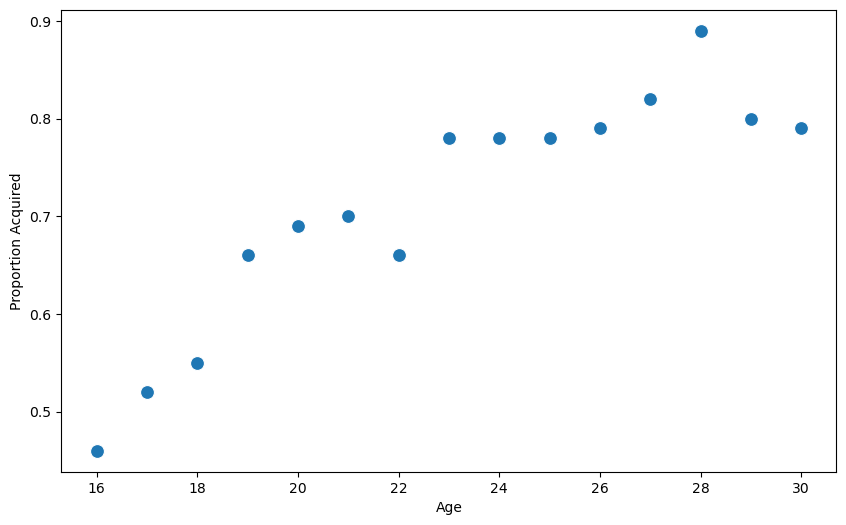

In [265]:
# 4. Create the Scatterplot
plt.figure(figsize=(10, 6))

# Scatterplot for the data points
sns.scatterplot(
    x='Age',
    y='Proportion Acquired',
    data=baa_baa_df,
    s=100  # Size of the points
)

In [266]:
# from sklearn.linear_model import LogisticRegression

# baa_baa_model = LogisticRegression()
# baa_baa_model.fit(baa_baa_df[['Age (Months)']], baa_baa_df['Proportion Acquired'])
# preds = baa_baa_model.predict_proba(baa_baa_df[['Age (Months)']])[:, 1]
# preds

Fitted Parameters for Acquisition Trajectory:
----------------------------------------
  Maximum Proportion (L): 0.8370
  Growth Rate (k): 0.2886
  Model-based Median AoA (x0): 15.29 months


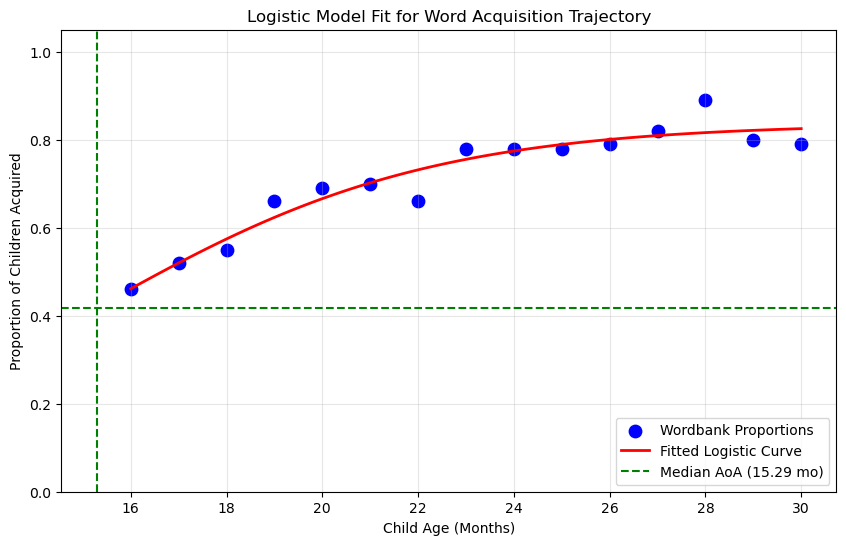

In [267]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 2. Define the Logistic (Sigmoid) Function ---
def sigmoid_3param(age, L, k, x0):
    """
    L: Maximum value (asymptote).
    k: Growth rate (steepness).
    x0: Inflection point (Median Age of Acquisition estimate).
    """
    return L / (1 + np.exp(-k * (age - x0)))

# --- 3. Extract Data for Fitting ---
X = baa_baa_df['Age'].values  # Independent variable (Age)
Y = baa_baa_df['Proportion Acquired'].values # Dependent variable (Proportion)

# --- 4. Perform the Curve Fit ---
# p0 provides initial "guesses" for the parameters (L, k, x0).
popt, pcov = curve_fit(sigmoid_3param, X, Y, p0=[1.0, 0.5, 22])

# Extract the optimal fitted parameters
L_fit, k_fit, x0_fit = popt

# --- 5. Print Results ---
print("Fitted Parameters for Acquisition Trajectory:")
print("-" * 40)
print(f"  Maximum Proportion (L): {L_fit:.4f}")
print(f"  Growth Rate (k): {k_fit:.4f}")
print(f"  Model-based Median AoA (x0): {x0_fit:.2f} months")

# --- 6. Plot the Fitted Curve vs. Raw Data ---
X_fit = np.linspace(X.min(), X.max(), 100)
preds = sigmoid_3param(X_fit, L_fit, k_fit, x0_fit)

plt.figure(figsize=(10, 6))

# Raw Data Points
plt.scatter(X, Y, label='Wordbank Proportions', color='blue', s=80)

# Fitted Curve
plt.plot(X_fit, preds, label='Fitted Logistic Curve', color='red', linestyle='-', linewidth=2)

# Highlight the estimated AoA
plt.axvline(x=x0_fit, color='green', linestyle='--', label=f'Median AoA ({x0_fit:.2f} mo)')
plt.axhline(y=L_fit / 2, color='green', linestyle='--')

plt.title('Logistic Model Fit for Word Acquisition Trajectory')
plt.xlabel('Child Age (Months)')
plt.ylabel('Proportion of Children Acquired')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [268]:
x0_fit

np.float64(15.287484138413065)

In [269]:
df_WS

,item_id,item_definition,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1,baa baa,sounds,0.46,0.52,0.55,0.66,0.69,0.70,0.66,0.78,0.78,0.78,0.79,0.82,0.89,0.80,0.79
1,2,choo choo,sounds,0.27,0.32,0.39,0.51,0.56,0.60,0.67,0.71,0.76,0.84,0.81,0.85,0.92,0.85,0.88
2,3,cockadoodledoo,sounds,0.13,0.10,0.14,0.22,0.22,0.29,0.31,0.37,0.43,0.45,0.49,0.53,0.70,0.54,0.58
3,4,grrr,sounds,0.54,0.50,0.54,0.63,0.61,0.65,0.63,0.73,0.76,0.76,0.75,0.80,0.90,0.79,0.80
4,5,meow,sounds,0.49,0.47,0.55,0.67,0.69,0.75,0.76,0.80,0.86,0.88,0.88,0.91,0.96,0.91,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,676,because,connecting_words,0.00,0.02,0.01,0.03,0.03,0.03,0.06,0.10,0.10,0.13,0.21,0.25,0.36,0.35,0.42
676,677,but,connecting_words,0.00,0.02,0.02,0.03,0.02,0.03,0.06,0.07,0.07,0.10,0.14,0.19,0.26,0.30,0.33
677,678,if,connecting_words,0.00,0.02,0.02,0.02,0.01,0.01,0.03,0.04,0.04,0.07,0.09,0.12,0.18,0.21,0.22
678,679,so,connecting_words,0.00,0.03,0.02,0.03,0.03,0.04,0.07,0.08,0.10,0.12,0.15,0.23,0.29,0.29,0.33


In [ ]:
# Now do it for all the words and store the parameters of the fitted sigmoid and the median age of acquisition

from scipy.optimize import curve_fit

# --- 1. Define the Logistic (Sigmoid) Function (Same as before) ---
def sigmoid_3param(age, L, k, x0):
    """
    L: Maximum proportion (asymptote).
    k: Growth rate.
    x0: Inflection point / Median AoA.
    """
    return L / (1 + np.exp(-k * (age - x0)))

# --- 2. Define the Column Range for Fitting (Ensure this matches your DataFrame) ---
AGE_COLUMNS = [str(a) for a in range(16, 31)]

# --- 3. The Revised Core Fitting Function ---
def calculate_sigmoid_params(row):
    """
    Fits the sigmoid curve to a single row and returns all three parameters (L, k, x0).
    """
    X = np.array([int(col) for col in AGE_COLUMNS])
    Y = row[AGE_COLUMNS].values
    p0 = [1.0, 0.5, 22] # Initial guesses (L, k, x0)

    try:
        # curve_fit returns the optimal parameters (popt)
        popt, pcov = curve_fit(sigmoid_3param, X, Y, p0=p0, maxfev=5000)
        
        # Return all three fitted parameters
        return pd.Series(popt, index=['L_fit', 'k_fit', 'x0_fit'])
        
    except RuntimeError:
        # If the fit fails, return a row of NaN values
        print(f"Warning: Curve fit failed for row/word. Returning NaN.")
        return pd.Series([np.nan, np.nan, np.nan], index=['L_fit', 'k_fit', 'x0_fit'])

# --- 4. Apply the Function to the DataFrame ---

# NOTE: This assumes 'df_WS' is your full Wordbank DataFrame with columns '16' through '30'.

print("Calculating all sigmoid parameters for all words...")

# Use .apply(axis=1) and assign the result directly to new columns.
# The result of the function is a pandas Series, which pandas unpacks into columns.
df_WS[['L_fit', 'k_fit', 'Median AoA']] = df_WS.apply(calculate_sigmoid_params, axis=1)

print("\nCalculation Complete.")


In [ ]:
# Display the key columns
df_WS[['item_definition', 'L_fit', 'k_fit', 'Median AoA']+AGE_COLUMNS]

In [ ]:
df_WS[df_WS['item_definition']=='because']

In [ ]:
# --- 2. Define the Columns for Data Extraction ---
AGE_COLUMNS = [str(a) for a in range(16, 31)]

# --- 3. PLOTTING GRID LOGIC ---

# NOTE: This code assumes your DataFrame 'df_WS' is loaded and the fitting columns 
# ('L_fit', 'k_fit', 'Median AoA') have already been added.

# Configuration for 680 rows
N_WORDS = len(df_WS)
# *** CHANGE HERE: Use 6 columns per row ***
N_COLS = 6 
N_ROWS = int(np.ceil(N_WORDS / N_COLS))

print(f"Generating plot grid: {N_ROWS} rows by {N_COLS} columns ({N_WORDS} total plots)...")

# Create figure and axes
# Set figure size dynamically: approx 3 inches wide per column, 2.5 inches tall per row.
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(N_COLS * 3, N_ROWS * 2.5), squeeze=False)
axes = axes.flatten()

# Prepare X data for plotting (Ages 16-30)
X_raw = np.array([int(col) for col in AGE_COLUMNS])
X_fit = np.linspace(X_raw.min(), X_raw.max(), 100)

# Loop through each word and plot
for i, row in df_WS.iterrows():
    ax = axes[i]
    
    # 1. Raw Proportion Data (Scatter Plot)
    Y_raw = row[AGE_COLUMNS].values
    ax.scatter(X_raw, Y_raw, label='Raw Proportions', color='blue', s=10) # Slightly larger dots
    
    # Check if the fit was successful
    if not np.isnan(row['L_fit']):
        
        # 2. Fitted Sigmoid Curve (Line Plot)
        L = row['L_fit']
        k = row['k_fit']
        x0 = row['Median AoA']
        
        Y_fit = sigmoid_3param(X_fit, L, k, x0)
        ax.plot(X_fit, Y_fit, label='Fitted Curve', color='red', linestyle='-', linewidth=1.5) # Thicker line
        
        # 3. Vertical Line at Median AoA
        ax.axvline(x=x0, color='green', linestyle='--', linewidth=1.5, 
                   label=f'AoA: {x0:.1f} mo')
        
        # Horizontal line at L/2 (the median proportion)
        ax.axhline(y=L / 2, color='gray', linestyle=':', alpha=0.7, linewidth=0.7)
    
    # Set plot title and labels 
    ax.set_title(f"{row['item_definition']}", fontsize=10) # Larger title font
    ax.set_xlabel('Age (mo)', fontsize=7)
    ax.set_ylabel('Prop.', fontsize=7)
    
    # Adjust ticks and limits
    ax.set_ylim(0, 1.05)
    ax.set_xticks(np.arange(X_raw.min(), X_raw.max() + 1, 8)) 
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(N_WORDS, N_ROWS * N_COLS):
    fig.delaxes(axes[j])

# Add a single overall title and adjust layout
fig.suptitle(f'Logistic Acquisition Trajectories for {N_WORDS} Words (6 Plots/Row)', fontsize=18, y=1.00)
plt.tight_layout(rect=[0, 0, 1, 0.99]) 

In [ ]:
print(df_WS[df_WS['item_definition'] == 'then']['Median AoA'])
df_WS[df_WS['item_definition'] == 'then']

In [275]:
# Notes:

# 1) For hard words, these predictions suck. Maybe try using Four-Parameter Logistic model with
# parameters for upper and lower asymptotes, too. Also try to include WG data for earlier ages.
# Actually maybe 2-parameter logistic with fixed L=1 and fixed lower asymptote=0 is better.
# Eventually we expect all children to learn these words, right?
    
# 2) Across the board, the data for 28 months seems unusally high. For basically every word, the max proportion
# occurs at 28 months, and even sometimes decreases at 29 and 30 months. Maybe drop the 28 column?
# Sara mentioned that there might be a deveelopmental explanation for this.

# 3) For a few easy words, like 'mommy' and 'daddy', the model predicts a Median AoA of <16 months, since almost
# all the kids know these words by 16 months. The model is extrapolating outside the data range here.
# Can use the WG data, which goes from 8 to 18 months, giving us earlier data points.

In [276]:
# TODO:

# 1) Add in WG data; see if this helps with logistic regression fit. Otherwise, try 4-parameter logistic.
# 2) Find article explaining 28-month anomaly.

In [277]:
df_WG = pd.read_csv('~/Downloads/wordbank_data_WG_Produces_en.csv')
df_WG.drop(columns=['downloaded'], inplace=True)
df_WG.head()

,item_id,item_definition,category,8,9,10,11,12,13,14,15,16,17,18
0,34,baa baa,sounds,0.18,0.22,0.25,0.23,0.26,0.26,0.35,0.35,0.45,0.50,0.59
1,35,choo choo,sounds,0.02,0.02,0.02,0.02,0.05,0.06,0.08,0.16,0.27,0.31,0.37
2,36,cockadoodledoo,sounds,0.01,0.01,0.02,0.02,0.01,0.02,0.03,0.08,0.13,0.14,0.19
3,37,grrr,sounds,0.05,0.09,0.18,0.16,0.17,0.26,0.27,0.33,0.52,0.50,0.57
4,38,meow,sounds,0.01,0.04,0.05,0.06,0.10,0.16,0.18,0.27,0.48,0.50,0.57


In [278]:
df_WS.head()

,item_id,item_definition,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1,baa baa,sounds,0.46,0.52,0.55,0.66,0.69,0.70,0.66,0.78,0.78,0.78,0.79,0.82,0.89,0.80,0.79
1,2,choo choo,sounds,0.27,0.32,0.39,0.51,0.56,0.60,0.67,0.71,0.76,0.84,0.81,0.85,0.92,0.85,0.88
2,3,cockadoodledoo,sounds,0.13,0.10,0.14,0.22,0.22,0.29,0.31,0.37,0.43,0.45,0.49,0.53,0.70,0.54,0.58
3,4,grrr,sounds,0.54,0.50,0.54,0.63,0.61,0.65,0.63,0.73,0.76,0.76,0.75,0.80,0.90,0.79,0.80
4,5,meow,sounds,0.49,0.47,0.55,0.67,0.69,0.75,0.76,0.80,0.86,0.88,0.88,0.91,0.96,0.91,0.92


In [279]:
baa_baa_WG = df_WG.iloc[0,:]
age_cols = [str(a) for a in range(8, 19)]
baa_baa_WG_proportions = baa_baa_WG.loc[age_cols]

# 3. Create a DataFrame suitable for plotting with seaborn
baa_baa_WG_df = pd.DataFrame({
    # Age is the index label, which we convert to integer for plotting
    'Age': baa_baa_WG_proportions.index.astype(int),
    # Proportion is the value associated with each age
    'Proportion Acquired': baa_baa_WG_proportions.values
})
print(baa_baa_WG_df)

    Age Proportion Acquired
0     8                0.18
1     9                0.22
2    10                0.25
3    11                0.23
4    12                0.26
5    13                0.26
6    14                0.35
7    15                0.35
8    16                0.45
9    17                 0.5
10   18                0.59


In [280]:
baa_baa_WS_df = baa_baa_df
print(baa_baa_WS_df)

    Age Proportion Acquired
0    16                0.46
1    17                0.52
2    18                0.55
3    19                0.66
4    20                0.69
5    21                 0.7
6    22                0.66
7    23                0.78
8    24                0.78
9    25                0.78
10   26                0.79
11   27                0.82
12   28                0.89
13   29                 0.8
14   30                0.79


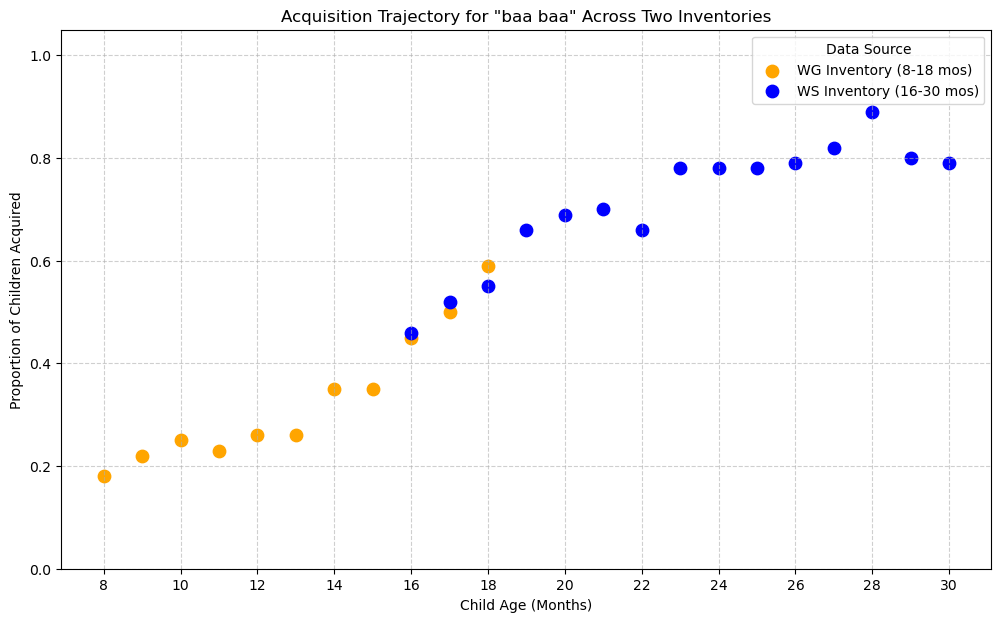

In [281]:
plt.figure(figsize=(12, 7))

# Plot WG Data (Orange Dots)
plt.scatter(
    baa_baa_WG_df['Age'],
    baa_baa_WG_df['Proportion Acquired'],
    color='orange',
    s=80,
    label='WG Inventory (8-18 mos)'
)

# Plot WS Data (Blue Dots)
plt.scatter(
    baa_baa_WS_df['Age'],
    baa_baa_WS_df['Proportion Acquired'],
    color='blue',
    s=80,
    label='WS Inventory (16-30 mos)'
)

# --- 4. Customizing the Plot ---
plt.title('Acquisition Trajectory for "baa baa" Across Two Inventories')
plt.xlabel('Child Age (Months)')
plt.ylabel('Proportion of Children Acquired')
plt.ylim(0, 1.05)
# Set x-ticks to appear every 2 months from 8 to 30
plt.xticks(np.arange(8, 31, 2))
plt.legend(title='Data Source')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [282]:
baa_baa_WG_df['Inventory'] = 'WG'
baa_baa_WS_df['Inventory'] = 'WS'
baa_baa_df = pd.concat([baa_baa_WG_df, baa_baa_WS_df], ignore_index=True)
display(baa_baa_df.head())
baa_baa_df.tail()

,Age,Proportion Acquired,Inventory
0,8,0.18,WG
1,9,0.22,WG
2,10,0.25,WG
3,11,0.23,WG
4,12,0.26,WG


,Age,Proportion Acquired,Inventory
21,26,0.79,WS
22,27,0.82,WS
23,28,0.89,WS
24,29,0.8,WS
25,30,0.79,WS


Fitted Parameters for Acquisition Trajectory:
----------------------------------------
  Maximum Proportion (L): 0.8755
  Growth Rate (k): 0.2261
  Model-based Median AoA (x0): 15.43 months


<Figure size 1000x600 with 0 Axes>

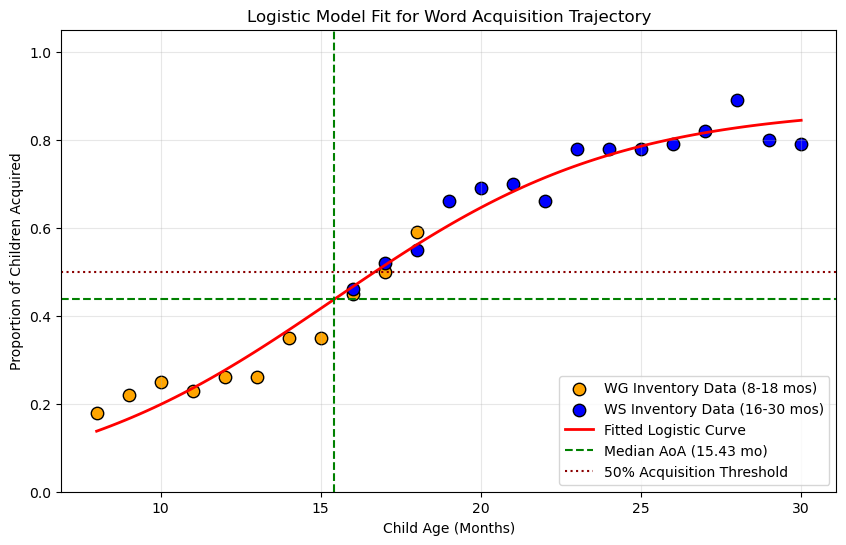

In [283]:
# --- 3. Extract Data for Fitting ---
X = baa_baa_df['Age'].values  # Independent variable (Age)
Y = baa_baa_df['Proportion Acquired'].values # Dependent variable (Proportion)

# --- 4. Perform the Curve Fit ---
# p0 provides initial "guesses" for the parameters (L, k, x0).
popt, pcov = curve_fit(sigmoid_3param, X, Y, p0=[1.0, 0.5, 22])

# Extract the optimal fitted parameters
L_fit, k_fit, x0_fit = popt

# --- 5. Print Results ---
print("Fitted Parameters for Acquisition Trajectory:")
print("-" * 40)
print(f"  Maximum Proportion (L): {L_fit:.4f}")
print(f"  Growth Rate (k): {k_fit:.4f}")
print(f"  Model-based Median AoA (x0): {x0_fit:.2f} months")

# --- 6. Plot the Fitted Curve vs. Raw Data ---
X_fit = np.linspace(X.min(), X.max(), 100)
preds = sigmoid_3param(X_fit, L_fit, k_fit, x0_fit)

plt.figure(figsize=(10, 6))

# --- Filter the Combined Data ---
df_wg = baa_baa_df[baa_baa_df['Inventory'] == 'WG']
df_ws = baa_baa_df[baa_baa_df['Inventory'] == 'WS']

plt.figure(figsize=(10, 6))

# 1. Raw Data Points: WG (Orange)
plt.scatter(
    df_wg['Age'],
    df_wg['Proportion Acquired'],
    label='WG Inventory Data (8-18 mos)',
    color='orange',
    s=80,
    edgecolors='black'
)

# 2. Raw Data Points: WS (Blue)
plt.scatter(
    df_ws['Age'],
    df_ws['Proportion Acquired'],
    label='WS Inventory Data (16-30 mos)',
    color='blue',
    s=80,
    edgecolors='black'
)

# Fitted Curve
plt.plot(X_fit, preds, label='Fitted Logistic Curve', color='red', linestyle='-', linewidth=2)

# Highlight the estimated AoA
plt.axvline(x=x0_fit, color='green', linestyle='--', label=f'Median AoA ({x0_fit:.2f} mo)')
plt.axhline(y=L_fit / 2, color='green', linestyle='--')

# Compare to 50% acquisition line
plt.axhline(y=0.5, color='darkred', linestyle=':', label='50% Acquisition Threshold', linewidth=1.5)

plt.title('Logistic Model Fit for Word Acquisition Trajectory')
plt.xlabel('Child Age (Months)')
plt.ylabel('Proportion of Children Acquired')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Fitted Parameters for Acquisition Trajectory:
----------------------------------------
  Growth Rate (k): 0.1708
  Model-based Median AoA (x0): 17.07 months


<Figure size 1000x600 with 0 Axes>

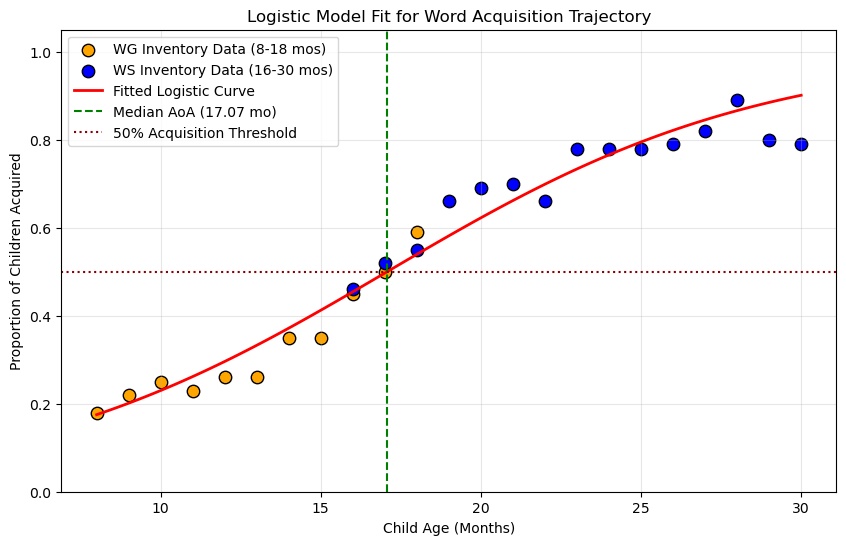

In [284]:
# Let's try a 2-parameter sigmoid, fixing L=1, instead
def sigmoid(age, k, x0):
    """
    k: Growth rate.
    x0: Inflection point / Median AoA.
    """
    return 1 / (1 + np.exp(-k * (age - x0)))

# --- 3. Extract Data for Fitting ---
X = baa_baa_df['Age'].values  # Independent variable (Age)
Y = baa_baa_df['Proportion Acquired'].values # Dependent variable (Proportion)

# --- 4. Perform the Curve Fit ---
# p0 provides initial "guesses" for the parameters (L, k, x0).
popt, pcov = curve_fit(sigmoid, X, Y, p0=[0.5, 22])

# Extract the optimal fitted parameters
k_fit, x0_fit = popt

# --- 5. Print Results ---
print("Fitted Parameters for Acquisition Trajectory:")
print("-" * 40)
print(f"  Growth Rate (k): {k_fit:.4f}")
print(f"  Model-based Median AoA (x0): {x0_fit:.2f} months")

# --- 6. Plot the Fitted Curve vs. Raw Data ---
X_fit = np.linspace(X.min(), X.max(), 100)
preds = sigmoid(X_fit, k_fit, x0_fit)

plt.figure(figsize=(10, 6))

# --- Filter the Combined Data ---
df_wg = baa_baa_df[baa_baa_df['Inventory'] == 'WG']
df_ws = baa_baa_df[baa_baa_df['Inventory'] == 'WS']

plt.figure(figsize=(10, 6))

# 1. Raw Data Points: WG (Orange)
plt.scatter(
    df_wg['Age'],
    df_wg['Proportion Acquired'],
    label='WG Inventory Data (8-18 mos)',
    color='orange',
    s=80,
    edgecolors='black'
)

# 2. Raw Data Points: WS (Blue)
plt.scatter(
    df_ws['Age'],
    df_ws['Proportion Acquired'],
    label='WS Inventory Data (16-30 mos)',
    color='blue',
    s=80,
    edgecolors='black'
)

# Fitted Curve
plt.plot(X_fit, preds, label='Fitted Logistic Curve', color='red', linestyle='-', linewidth=2)

# Highlight the estimated AoA
plt.axvline(x=x0_fit, color='green', linestyle='--', label=f'Median AoA ({x0_fit:.2f} mo)')
#plt.axhline(y=L_fit / 2, color='green', linestyle='--')

# Compare to 50% acquisition line
plt.axhline(y=0.5, color='darkred', linestyle=':', label='50% Acquisition Threshold', linewidth=1.5)

plt.title('Logistic Model Fit for Word Acquisition Trajectory')
plt.xlabel('Child Age (Months)')
plt.ylabel('Proportion of Children Acquired')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [285]:
# Not all words in WG are in WS. Check which ones are missing.
print(df_WS.shape, df_WG.shape)
print(df_WG['item_definition'].isin(df_WS['item_definition']).all())
mask = df_WG['item_definition'].isin(df_WS['item_definition'])
missing = df_WG[~mask]
missing

(680, 18) (396, 14)
False


,item_id,item_definition,category,8,9,10,11,12,13,14,15,16,17,18
380,414,in,locations,0.0,0.0,0.02,0.01,0.01,0.01,0.02,0.04,0.05,0.09,0.09
381,415,inside,locations,0.0,0.0,0.01,0.02,0.01,0.00,0.01,0.03,0.02,0.05,0.06


In [286]:
# Actually, it's just that inside and in were combined into one item "inside/in" in WS.
df_WS.iloc[622:623]

,item_id,item_definition,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
622,623,inside/in,locations,0.07,0.07,0.13,0.21,0.19,0.23,0.35,0.44,0.49,0.55,0.6,0.63,0.82,0.7,0.72


In [287]:
# Let's split the "inside/in" row into two rows, one for "inside" and one for "in".

# --- 1. Isolate the row and create copies ---

# Isolate the target row
original_row = df_WS[df_WS['item_definition'] == 'inside/in'].copy()

# Create the new 'in' row (deepcopy is a safe practice)
new_row_in = original_row.copy()
new_row_in['item_definition'] = 'in'

# Create the new 'inside' row
new_row_inside = original_row.copy()
new_row_inside['item_definition'] = 'inside'


# --- 2. Remove the original row from the main DataFrame ---

# Filter out the 'inside/in' row.
df_WS = df_WS[df_WS['item_definition'] != 'inside/in'].copy()


# --- 3. Concatenate the filtered DF with the two new rows ---

# Combine the filtered data with the two new rows
df_WS = pd.concat(
    [df_WS, new_row_in, new_row_inside],
    ignore_index=True  # Optional: resets the index
)

print("Updated DataFrame (New 'in' and 'inside' rows added):")
display(df_WS[df_WS['item_definition'].isin(['in', 'inside'])])

Updated DataFrame (New 'in' and 'inside' rows added):


,item_id,item_definition,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
679,623,in,locations,0.07,0.07,0.13,0.21,0.19,0.23,0.35,0.44,0.49,0.55,0.6,0.63,0.82,0.7,0.72
680,623,inside,locations,0.07,0.07,0.13,0.21,0.19,0.23,0.35,0.44,0.49,0.55,0.6,0.63,0.82,0.7,0.72


In [288]:
# Which words in WS are not in WG?
df_WS[~df_WS['item_definition'].isin(df_WG['item_definition'])]

,item_id,item_definition,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
12,13,alligator,animals,0.02,0.04,0.06,0.12,0.11,0.18,0.24,0.30,0.39,0.46,0.48,0.50,0.74,0.65,0.66
14,15,ant,animals,0.04,0.06,0.10,0.17,0.18,0.20,0.25,0.36,0.42,0.48,0.50,0.54,0.74,0.63,0.64
33,34,hen,animals,0.01,0.03,0.02,0.05,0.04,0.10,0.09,0.14,0.16,0.19,0.20,0.23,0.44,0.28,0.29
39,40,moose,animals,0.02,0.07,0.05,0.09,0.08,0.11,0.13,0.23,0.24,0.26,0.27,0.29,0.49,0.38,0.41
46,47,rooster,animals,0.02,0.03,0.03,0.06,0.08,0.11,0.13,0.23,0.25,0.31,0.33,0.40,0.57,0.42,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,676,because,connecting_words,0.00,0.02,0.01,0.03,0.03,0.03,0.06,0.10,0.10,0.13,0.21,0.25,0.36,0.35,0.42
675,677,but,connecting_words,0.00,0.02,0.02,0.03,0.02,0.03,0.06,0.07,0.07,0.10,0.14,0.19,0.26,0.30,0.33
676,678,if,connecting_words,0.00,0.02,0.02,0.02,0.01,0.01,0.03,0.04,0.04,0.07,0.09,0.12,0.18,0.21,0.22
677,679,so,connecting_words,0.00,0.03,0.02,0.03,0.03,0.04,0.07,0.08,0.10,0.12,0.15,0.23,0.29,0.29,0.33


In [293]:
# Okay, I think it makes sense to combine the WG and WS data.
# But let's add an extra column to indicate which inventory each data point came from.

df_WG['Inventory'] = 'WG'
df_WS['Inventory'] = 'WS'
df = pd.concat([df_WG, df_WS], ignore_index=True)
df.shape, df_WG.shape, df_WS.shape

((1077, 27), (396, 15), (681, 19))

In [294]:
df.columns
column_order = ['item_id', 'Inventory', 'item_definition', 'category', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30']
df = df[column_order]
df.head()

,item_id,Inventory,item_definition,category,8,9,10,11,12,13,...,21,22,23,24,25,26,27,28,29,30
0,34,WG,baa baa,sounds,0.18,0.22,0.25,0.23,0.26,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,WG,choo choo,sounds,0.02,0.02,0.02,0.02,0.05,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,WG,cockadoodledoo,sounds,0.01,0.01,0.02,0.02,0.01,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,WG,grrr,sounds,0.05,0.09,0.18,0.16,0.17,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,WG,meow,sounds,0.01,0.04,0.05,0.06,0.10,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
baa_baa_df = df[df['item_definition']=='baa baa']
print(baa_baa_df)

     item_id Inventory item_definition category     8     9    10    11    12  \
0         34        WG         baa baa   sounds  0.18  0.22  0.25  0.23  0.26   
396        1        WS         baa baa   sounds   NaN   NaN   NaN   NaN   NaN   

       13  ...   21    22    23    24    25    26    27    28   29    30  
0    0.26  ...  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  
396   NaN  ...  0.7  0.66  0.78  0.78  0.78  0.79  0.82  0.89  0.8  0.79  

[2 rows x 27 columns]


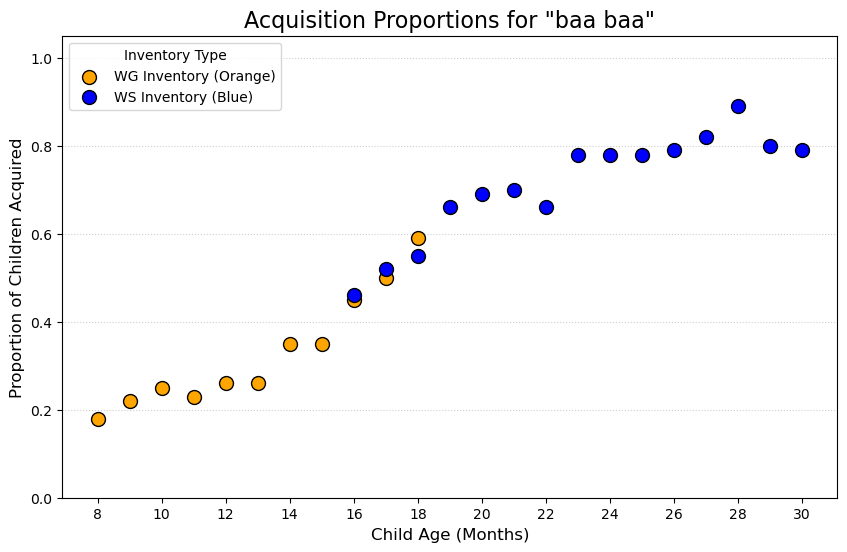

In [306]:
AGE_COLS = [str(a) for a in range(8, 31)]

# --- Prepare WG Data (Row where Inventory == 'WG') ---
df_wg_row = baa_baa_df[baa_baa_df['Inventory'] == 'WG']
wg_series = df_wg_row.loc[:, AGE_COLS].iloc[0].dropna()
# Extract the X (Age) and Y (Proportion) values
wg_ages = wg_series.index.astype(int)
wg_proportions = wg_series.values

# --- Prepare WS Data (Row where Inventory == 'WS') ---
df_ws_row = baa_baa_df[baa_baa_df['Inventory'] == 'WS']
ws_series = df_ws_row.loc[:, age_cols].iloc[0].dropna()
# Extract the X (Age) and Y (Proportion) values
ws_ages = ws_series.index.astype(int)
ws_proportions = ws_series.values

# --- 3. Create the Scatter Plot using Matplotlib ---

plt.figure(figsize=(10, 6))

# Plot WG Data in orange
plt.scatter(
    wg_ages,
    wg_proportions,
    label='WG Inventory (Orange)',
    color='orange',
    s=100,
    edgecolors='black',
    zorder=3
)

# Plot WS Data in blue
plt.scatter(
    ws_ages,
    ws_proportions,
    label='WS Inventory (Blue)',
    color='blue',
    s=100,
    edgecolors='black',
    zorder=3
)

# --- 4. Customization and Styling ---
plt.title('Acquisition Proportions for "baa baa"', fontsize=16)
plt.xlabel('Child Age (Months)', fontsize=12)
plt.ylabel('Proportion of Children Acquired', fontsize=12)

# Set X-axis ticks for better visualization
all_ages = np.concatenate([wg_ages, ws_ages])
plt.ylim(0, 1.05)
plt.xticks(np.arange(all_ages.min(), all_ages.max() + 1, 2))
plt.legend(title='Inventory Type')
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.show()

In [309]:
# --- 1. Simulate the Input DataFrame (baa_baa_df) ---
# This simulates the two rows you currently have.
age_cols = [str(a) for a in range(8, 31)]

data_wide = {
    'item_id': [34, 1],
    'Inventory': ['WG', 'WS'],
    'item_definition': ['baa baa', 'baa baa'],
    'category': ['sounds', 'sounds'],
    # Data for Ages 8 to 30 with overlaps/NaNs
    '8': [0.18, np.nan], '9': [0.22, np.nan], '10': [0.25, np.nan], '11': [0.23, np.nan],
    '12': [0.26, np.nan], '13': [0.26, np.nan], '14': [0.35, np.nan], '15': [0.35, np.nan],
    '16': [0.45, 0.46], '17': [0.50, 0.52], '18': [0.59, 0.55],
    '19': [np.nan, 0.66], '20': [np.nan, 0.69], '21': [np.nan, 0.70], '22': [np.nan, 0.66],
    '23': [np.nan, 0.78], '24': [np.nan, 0.78], '25': [np.nan, 0.78], '26': [np.nan, 0.79],
    '27': [np.nan, 0.82], '28': [np.nan, 0.89], '29': [np.nan, 0.80], '30': [np.nan, 0.79],
}
baa_baa_df = pd.DataFrame(data_wide)
baa_baa_df

# Define the columns that identify each row
id_columns = ['item_id', 'Inventory', 'item_definition', 'category']

baa_baa_long_df = pd.melt(
    baa_baa_df,
    id_vars=id_columns,
    value_vars=age_cols,          # Columns containing the proportional values
    var_name='Age_Months',        # New column for Age
    value_name='Proportion_Acquired' # New column for the proportion value (Y)
)
baa_baa_long_df

,item_id,Inventory,item_definition,category,Age_Months,Proportion_Acquired
0,34,WG,baa baa,sounds,8,0.18
1,1,WS,baa baa,sounds,8,NaN
2,34,WG,baa baa,sounds,9,0.22
3,1,WS,baa baa,sounds,9,NaN
4,34,WG,baa baa,sounds,10,0.25
5,1,WS,baa baa,sounds,10,NaN
6,34,WG,baa baa,sounds,11,0.23
7,1,WS,baa baa,sounds,11,NaN
8,34,WG,baa baa,sounds,12,0.26
9,1,WS,baa baa,sounds,12,NaN
